# Restaurants Near UCI Yelp Review - Team One

In [1]:
#Created on Wed Sep 12 21:30:55 2018
#@author: Shyla Samuel,Janette Bennett,Brian Ahn, anthonyalvarez


---
### Referenced Material
 * https://stackoverflow.com/questions/45803676/python-pandas-loc-filter-for-list-of-values
 * https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
 * https://pandas.pydata.org/pandas-docs/stable/indexing.html    
 * https://chrisalbon.com/python/data_wrangling/pandas_selecting_rows_on_conditions/
 * https://cmdlinetips.com/2018/01/how-to-get-unique-values-from-a-column-in-pandas-data-frame/
 * https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
 * https://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111
 * https://stackoverflow.com/questions/45247486/how-to-do-a-scatter-plot-with-different-edgecolor-in-matplotlib
 * https://stackoverflow.com/questions/311627/how-to-print-date-in-a-regular-format-in-python
 * from lessons Evr_Tweet_Breaker #01-Lessons/07-Social-Analytics/01-Getting-Twitter-Data/04-Evr_Break_Tweet_JSON/Solved/Evr_Tweet_Breaker.ipynb
 * from homework and articles s.o.f.
 * https://stackoverflow.com/questions/17518937/saving-a-json-file-to-computer-python
 * https://stackoverflow.com/questions/14114729/save-a-large-file-using-the-python-requests-library
 * https://github.com/Yelp/yelp-python
 * https://www.programiz.com/python-programming/methods/string/count
 * https://stackoverflow.com/questions/36252719/matplotlib-adjusting-the-ticks-to-fit-within-the-figure
 * https://stackoverflow.com/questions/32244019/how-to-rotate-x-axis-tick-labels-in-pandas-barplot
 * https://matplotlib.org/gallery/ticks_and_spines/ticklabels_rotation.html
 * https://stackoverflow.com/questions/24120023/strange-error-with-matplotlib-axes-labels
 * https://matplotlib.org/examples/text_labels_and_annotations/text_demo_fontdict.html
 * https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html
 * https://stackoverflow.com/questions/311627/how-to-print-date-in-a-regular-format-in-python

---
## Data Sources

### Excel ![Data Sources Used](images/excelcsv_med.png "Excel Csv")

* [UCI Location Information](data/uciinfo.csv) UCI Location Information.
* [Businesses (Restaurants) Nearby](data/uci_yelp_businesses.csv) List of restaurants within 1 mile walking distance.
* [All Yelp Reviews for Businesses](data/uci_yelp_reviews_main.csv) List of yelp reviews for business max(3) per.
* [Merged Business and Reviews](data/uci_yelp_reviews_merged.csv) Combined set of data for each business and each review.
* [Yelp Sentiments](data/uci_yelp_sentiments.csv) Yelp review sentiments.

### JSON ![Data Sources Used](images/json-logo-med.png "JSON")
* [UCI location](data/00_uci_start_info.json) UCI Location lat/lon.
* [UCI Address](data/01_uci_address.json) UCI Addresss information.


## API Sources

#### Google Maps ![Data Sources Used](images/googledev.png "JSON")
* https://developers.google.com/

#### YELP! ![Data Sources Used](images/yelpdev.png "JSON")
* https://www.yelp.com/developers
    

---
### Data Visualizations

<a href="images/overall_review_sentiment_yelp.png" target="_blank">Overall Review Sentiment</a>
<img src="images/overall_review_sentiment_yelp.png" alt="Overall Review Sentiment" height="600" width="400">

<a href="images/xxxxxxxxxxxxxxxx.png" target="_blank">xxxxxxxxxxxxxxxxxxxx</a>
<img src="images/xxxxxxxxxxx.png" alt="xxxxxxxxxxxxxxxxxxxxx" height="600" width="400">

<a href="images/xxxxxxxxxxxxxxxx.png" target="_blank">xxxxxxxxxxxxxxxxxxxx</a>
<img src="images/xxxxxxxxxxx.png" alt="xxxxxxxxxxxxxxxxxxxxx" height="600" width="400">

<a href="images/xxxxxxxxxxxxxxxx.png" target="_blank">xxxxxxxxxxxxxxxxxxxx</a>
<img src="images/xxxxxxxxxxx.png" alt="xxxxxxxxxxxxxxxxxxxxx" height="600" width="400">

<a href="images/xxxxxxxxxxxxxxxx.png" target="_blank">xxxxxxxxxxxxxxxxxxxx</a>
<img src="images/xxxxxxxxxxx.png" alt="xxxxxxxxxxxxxxxxxxxxx" height="600" width="400">

<a href="images/xxxxxxxxxxxxxxxx.png" target="_blank">xxxxxxxxxxxxxxxxxxxx</a>
<img src="images/xxxxxxxxxxx.png" alt="xxxxxxxxxxxxxxxxxxxxx" height="600" width="400">

<a href="images/xxxxxxxxxxxxxxxx.png" target="_blank">xxxxxxxxxxxxxxxxxxxx</a>
<img src="images/xxxxxxxxxxx.png" alt="xxxxxxxxxxxxxxxxxxxxx" height="600" width="400">

<a href="images/xxxxxxxxxxxxxxxx.png" target="_blank">xxxxxxxxxxxxxxxxxxxx</a>
<img src="images/xxxxxxxxxxx.png" alt="xxxxxxxxxxxxxxxxxxxxx" height="600" width="400">

<a href="images/xxxxxxxxxxxxxxxx.png" target="_blank">xxxxxxxxxxxxxxxxxxxx</a>
<img src="images/xxxxxxxxxxx.png" alt="xxxxxxxxxxxxxxxxxxxxx" height="600" width="400">

<a href="images/xxxxxxxxxxxxxxxx.png" target="_blank">xxxxxxxxxxxxxxxxxxxx</a>
<img src="images/xxxxxxxxxxx.png" alt="xxxxxxxxxxxxxxxxxxxxx" height="600" width="400">

---
### Import Warnings

In [2]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

---
### Import Dependencies

In [3]:
%matplotlib notebook

# Dependencies
import json
import pprint
import requests
import sys
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import gmaps


#api keys
from config_api import GEOCODE_API_KEY, YELP_API_KEY

#Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#time manipulations
from datetime import datetime, timedelta

gmaps.configure(api_key=GEOCODE_API_KEY)

---
### File Operations

In [4]:
#file operations
#get the dates for output files
title_date = datetime.now().strftime("%m/%d/%y")
file_date = datetime.now().strftime("%m%d%y")
print(title_date)
print(file_date)

09/21/18
092118


---
### Functions

In [5]:
#functions
def load_json(jsonfile):
    """Load JSON from a file"""
    with open(jsonfile) as file_handle:
        return json.load(file_handle)
    
def milestometers(num_miles):
    #mtm = 1.609 * num_miles
    mtm = 1609.34 * num_miles
    mtm = int(mtm)
    return mtm

def meterstomiles(num_meters):
    mtm = num_meters / 1609.34
    mtm = round(mtm,2)
    return mtm

def getyelpreview(yelpid,API_KEY):
    review_url = f'https://api.yelp.com/v3/businesses/{yelpid}/reviews'
    review_headers = {'Authorization': 'Bearer {}'.format(API_KEY),}

    try:
        review_response = requests.get(review_url, headers=review_headers)
        review_responsetype = review_response.status_code
    
        review_data = review_response.json()
        
        #--testing--------->
        #print(response)
        #print(type(response.text))
        #print(response.text[:1000])
        #print(review_data)
        #<----end testing
        
        return review_data
    
    except:
        #print('EXCEPTION')
        return None

def getyelpbusiness(term,location,lat,lng,SEARCH_LIMIT,SEARCH_RADIUS,API_KEY):
    url = 'https://api.yelp.com/v3/businesses/search'

    headers = {
        'Authorization': 'Bearer {}'.format(API_KEY),
            }

    url_params = {
                'term': term.replace(' ', '+'),
                #'location': location.replace(' ', '+'),
                'latitude': lat,
                'longitude': lng,
                'radius': SEARCH_RADIUS,
                'limit': SEARCH_LIMIT
            }

    try:
        business_response = requests.get(url, headers=headers, params=url_params)
        business_data = business_response.json()
        
        #--testing--------->
        #print(response)
        #print(type(response.text))
        #print(response.text[:1000])
        #print(review_data)
        #<----end testing
        
        return business_data
    
    except:
        #print('EXCEPTION')
        return None
    


def makebar_chart(x_axis, y_axis ,chartname, imagename, x_title, y_title
            ,x_label_color="black", y_label_color="black", label_rotation="horizontal"
            ,font_family="sans-serif", font_size=10, fig_h=4, fig_l=4
            ,barcolors = ["red","green","lightblue","orange"]):

    #https://matplotlib.org/examples/text_labels_and_annotations/text_demo_fontdict.html
    font = {'family': font_family,
            'color':  'blue',
            'weight': 'bold',
            'size': font_size,
            }
    
    #set the sieze
    plt.figure(figsize=(fig_h,fig_l))
    plt.title(chartname)

    #add font style
    plt.xlabel(x_title, fontdict=font, color=x_label_color)
    plt.ylabel(y_title, fontdict=font, color=y_label_color)

    plt.bar(x_axis, y_axis, color=barcolors, align="center")
    plt.xticks(x_axis, x_axis, rotation=label_rotation)

    #set the counter to zero
    counter = 0
    for row in y_axis:
        num_perc=round(row,2)
        
        #need to change the y value else all labels are on horizontal zero line
        if num_perc < 0:
            ycolor = 'red'
        
            
        
        #xloc = com_row + 0.0075
        xloc = counter
        yloc = num_perc + 0.0075
        ycolor = 'black'
        plt.text(xloc, yloc, num_perc, ha='center', color=ycolor)
    
        #increment counter
        counter += 1

    plt.tight_layout()
    plt.grid()

    #save the plot
    plt.savefig("images/" + imagename)
    plt.show()

    #---------------->
    

def makebar(x_axis, y_axis ,chartname, imagename, x_title, y_title
            ,x_label_color="black", y_label_color="black", label_rotation="horizontal"
            ,font_family="sans-serif", font_size=10, fig_h=4, fig_l=4
            ,barcolors = ["purple","green","lightblue","orange"]):

    #https://matplotlib.org/examples/text_labels_and_annotations/text_demo_fontdict.html
    font = {'family': font_family,
            'color':  'blue',
            'weight': 'bold',
            'size': font_size,
            }
    
    #find the proper color based on percent value
    #percentagecolors = []
    #for value in percenttumor['PercentChange']:
    #    #print(value)
    #    if value < 0:
    #        percentagecolors.append('blue')
    #    else:
    #        percentagecolors.append('red')
        
    #now change into list comprehension
    #https://stackoverflow.com/questions/4406389/if-else-in-a-list-comprehension
    percentagecolors = [ 'blue' if perc <0 else 'red' for perc in y_axis]
    
    
    #set the sieze
    plt.figure(figsize=(fig_h,fig_l))
    plt.title(chartname)

    #add font style
    plt.xlabel(x_title, fontdict=font, color=x_label_color)
    plt.ylabel(y_title, fontdict=font, color=y_label_color)

    plt.bar(x_axis, y_axis, color=barcolors, align="center")
    plt.xticks(x_axis, x_axis, rotation=label_rotation)
    
    plt.axhline(y=0, color = 'blue')
    
    #set the counter to zero
    counter = 0
    for row in y_axis:
        num_perc=round(row,2)   
        
        #xloc = com_row + 0.0075
        xloc = counter
        
        #deal with negative values on the label so they line up properly
        #yloc = num_perc + 0.0075
        if num_perc < 0:
            yloc = num_perc - 0.025
            #+ 0.0075
        else:
            yloc = num_perc + 0.01
        
        
        ycolor = 'black'
        plt.text(xloc, yloc, num_perc, ha='center', color=ycolor)
    
        #increment counter
        counter += 1

    plt.tight_layout()
    plt.grid()

    #save the plot
    plt.savefig("images/" + imagename)
    plt.show()

    #---------------->

def scatterbyvalue(distance1, review1, count1, distance2, review2, count2, distance3, review3, count3
                  ,xlabel,ylabel,maptitle,legendtitle,imagename):
    plt.figure(figsize=(10,8))
    plt.scatter(distance1, review1, color = "blue", edgecolors="black", s = count1 *10, 
                label = "1", alpha = 0.5, linewidth = 1.5)
    plt.scatter(distance2, review2, color = "yellow", edgecolors="black", s = count2*10, 
                label = "2", alpha = 0.5, linewidth = 1.5)
    plt.scatter(distance3, review3, color = "red", edgecolors="black", s = count3*10, 
                label = "3", alpha = 0.5, linewidth = 1.5)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(maptitle)
    bubble_lgnd = plt.legend(title = legendtitle, loc="best")
    bubble_lgnd.legendHandles[0]._sizes=[25]
    bubble_lgnd.legendHandles[1]._sizes=[25]
    bubble_lgnd.legendHandles[2]._sizes=[25]
    plt.grid(True)
    plt.savefig("images/" + imagename)
    plt.show()



## Functional Logic

---
### Google API Definitions

##### get latitude/longitude information by location name

In [6]:
#get coordinates by location name
origin_city = "Irvine,California"

#replacing spaces for HTML Encoding?
origin_city = origin_city.replace(" ","%20")

base_url = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json?"
location_name = "University of California Irvine"
input_name = location_name.replace(" ","%20")

input_url = "input=" + input_name
input_fields = "&inputtype=textquery&fields=photos,formatted_address,name,rating,opening_hours,geometry"
key_info = "&key="
target_url = f"{base_url}{input_url}{input_fields}{key_info}{GEOCODE_API_KEY}"


---
##### Run a request to endpoint and convert result to json

In [7]:
# Run a request to endpoint and convert result to json
uci_start_info = requests.get(target_url).json()

# Print the json
print(uci_start_info)

{'candidates': [{'formatted_address': 'Irvine, CA 92697, USA', 'geometry': {'location': {'lat': 33.6404952, 'lng': -117.8442962}, 'viewport': {'northeast': {'lat': 33.66208720000001, 'lng': -117.81300975}, 'southwest': {'lat': 33.625382, 'lng': -117.86935515}}}, 'name': 'University of California Irvine', 'photos': [{'height': 3024, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/103012318601018077697/photos">Sy Guo</a>'], 'photo_reference': 'CmRaAAAAlhg4unlpB3hYmxH24PG6c0kHDYUxF8iThYxWmVd0IRQFf5jRmIOHca6VzFaLpmxPFv9hkJvlrC30_mBltBr-rTw96QNV15D66hPvx8ArmPkv415XPT6PhM06XxrxQ2OTEhA6CY6htPi1hhMTKferIZDOGhQoETS4Xfb6DI6Znwgn2Mipn76RQQ', 'width': 4032}], 'rating': 4.2}], 'debug_log': {'line': []}, 'status': 'OK'}


---
#### start saving files in case we hit the max limit error


In [8]:
#save json data
file_path = "data/"
file_name = "00_uci_start_latlon.json"
file_save = file_path + file_name

#from homework and articles s.o.f.
#https://stackoverflow.com/questions/17518937/saving-a-json-file-to-computer-python
#https://stackoverflow.com/questions/14114729/save-a-large-file-using-the-python-requests-library

#saving the file in case i get blocked due to over limit warnings again
with open(file_save, "w") as f:
    json.dump(uci_start_info, f)


---
###### pretty print to view data definition

In [9]:
#print out json file
print(json.dumps(uci_start_info, indent=4, sort_keys=True))

{
    "candidates": [
        {
            "formatted_address": "Irvine, CA 92697, USA",
            "geometry": {
                "location": {
                    "lat": 33.6404952,
                    "lng": -117.8442962
                },
                "viewport": {
                    "northeast": {
                        "lat": 33.66208720000001,
                        "lng": -117.81300975
                    },
                    "southwest": {
                        "lat": 33.625382,
                        "lng": -117.86935515
                    }
                }
            },
            "name": "University of California Irvine",
            "photos": [
                {
                    "height": 3024,
                    "html_attributions": [
                        "<a href=\"https://maps.google.com/maps/contrib/103012318601018077697/photos\">Sy Guo</a>"
                    ],
                    "photo_reference": "CmRaAAAAlhg4unlpB3hYmxH24PG6c0kHDYUxF8iThY

---
##### grab the address information

In [10]:
#get important information
location_info = uci_start_info["candidates"]
location_info

[{'formatted_address': 'Irvine, CA 92697, USA',
  'geometry': {'location': {'lat': 33.6404952, 'lng': -117.8442962},
   'viewport': {'northeast': {'lat': 33.66208720000001, 'lng': -117.81300975},
    'southwest': {'lat': 33.625382, 'lng': -117.86935515}}},
  'name': 'University of California Irvine',
  'photos': [{'height': 3024,
    'html_attributions': ['<a href="https://maps.google.com/maps/contrib/103012318601018077697/photos">Sy Guo</a>'],
    'photo_reference': 'CmRaAAAAlhg4unlpB3hYmxH24PG6c0kHDYUxF8iThYxWmVd0IRQFf5jRmIOHca6VzFaLpmxPFv9hkJvlrC30_mBltBr-rTw96QNV15D66hPvx8ArmPkv415XPT6PhM06XxrxQ2OTEhA6CY6htPi1hhMTKferIZDOGhQoETS4Xfb6DI6Znwgn2Mipn76RQQ',
    'width': 4032}],
  'rating': 4.2}]

---
##### set variables to holde lat/lon information

In [11]:
uci_coords = location_info[0]["geometry"]["location"]
#uci_coords

uci_lat = uci_coords["lat"]
uci_lng = uci_coords["lng"]

print(f"{uci_coords}")

print(f'LAT: {uci_lat} - LNG: {uci_lng}')

{'lat': 33.6404952, 'lng': -117.8442962}
LAT: 33.6404952 - LNG: -117.8442962


---
##### reverse Geocode for accurate address

In [12]:
#Reverse Geocode for accurate address
#https://maps.googleapis.com/maps/api/geocode/json?latlng=33.6404952,-117.8442962&key=
addr_url = f"https://maps.googleapis.com/maps/api/geocode/json?latlng={uci_lat},{uci_lng}&key={GEOCODE_API_KEY}"
#print(addr_url)

In [13]:
#Run a request to endpoint and convert result to json
uci_addr_info = requests.get(addr_url).json()

# Print the json
#print(uci_addr_info)

In [14]:
#print out json file
print(json.dumps(uci_addr_info, indent=4, sort_keys=True))

{
    "plus_code": {
        "compound_code": "J5R4+57 Irvine, CA, USA",
        "global_code": "8554J5R4+57"
    },
    "results": [
        {
            "address_components": [
                {
                    "long_name": "10",
                    "short_name": "10",
                    "types": [
                        "street_number"
                    ]
                },
                {
                    "long_name": "Curie Court",
                    "short_name": "Curie Ct",
                    "types": [
                        "route"
                    ]
                },
                {
                    "long_name": "Irvine",
                    "short_name": "Irvine",
                    "types": [
                        "locality",
                        "political"
                    ]
                },
                {
                    "long_name": "Orange County",
                    "short_name": "Orange County",
                    "types"

In [15]:
uci_address = uci_addr_info["results"][0]["formatted_address"]

---
##### create a dataframe to hold location information

In [16]:
#create a dataframe to hold location information
uci_address_df = pd.DataFrame({"Location Name" : location_name
                              ,"Address" : uci_address
                              ,"lat" : uci_lat
                              ,"lng" : uci_lng
                              }, index=[0])

uci_address_df

,Location Name,Address,lat,lng
0,University of California Irvine,"10 Curie Ct, Irvine, CA 92617, USA",33.640495,-117.844296


---
##### save the dataframe to csv

In [17]:
#save the dataframe
uci_address_df.to_csv(file_path + "uciinfo.csv", header=True)

In [18]:
#store results in variables 
ulat = uci_address_df['lat']
ulng = uci_address_df['lng']
uname = uci_address_df['Location Name']
uaddress = uci_address_df['Address']

#define some business search variables
bus_term = 'Restaurants'
bus_location = 'Irvine, California'
bus_limit = 50
#set the search radius equal to 2 miles around the location
bus_radius = milestometers(1)


---
##### grab all the yelp info with the above requirements

In [19]:
#get yelp business info with above requirements
yelp_info = getyelpbusiness(bus_term,bus_location,ulat,ulng,bus_limit,bus_radius,YELP_API_KEY)

In [20]:
print(json.dumps(yelp_info, indent=4, sort_keys=True))

{
    "businesses": [
        {
            "alias": "thai-style-irvine",
            "categories": [
                {
                    "alias": "thai",
                    "title": "Thai"
                },
                {
                    "alias": "foodstands",
                    "title": "Food Stands"
                }
            ],
            "coordinates": {
                "latitude": 33.6409916584226,
                "longitude": -117.855753420789
            },
            "display_phone": "(760) 274-4112",
            "distance": 1062.0618867660112,
            "id": "Ut9709JWjLlx9CYyTjYYKg",
            "image_url": "https://s3-media1.fl.yelpcdn.com/bphoto/mgxj1I60Fkib-4chMCEttg/o.jpg",
            "is_closed": false,
            "location": {
                "address1": "5171 California Ave",
                "address2": "",
                "address3": null,
                "city": "Irvine",
                "country": "US",
                "display_address": [
   

---
##### view the main parts of the api get call

In [21]:

for x in yelp_info:
    print(x)
    
#from this we only want to know the details from the [businesses] item

businesses
total
region


---
### YELP API Definitions

---
##### pull the data from the yelp api business call and build a list containing a dictionary object

In [22]:

restaurants = []
rest_info = {}

for restaurant in yelp_info["businesses"]:
    #print(restaurant["name"])
    
    #rest_type = restaurant["categories"][0]
    #rest_subtype = restaurant["categories"]
    
    #print(f'{rest_name} - {rest_type} - {rest_subtype}')   
    #print(f'{rest_subtype[0]}')   
    
    rest_name = restaurant["name"]
    
    #account for the number of possible categories, we only want a max of 2
    numlen = len(restaurant["categories"])
    #print(numlen)
    if numlen <1:
        rest_type = "n/a"
        rest_subtype = "n/a"
    elif numlen == 1:
        rest_type = restaurant["categories"][0]["title"]
        rest_subtype = "n/a"
    elif numlen > 1:
        rest_type = restaurant["categories"][0]["title"]
        rest_subtype = restaurant["categories"][1]["title"]
    else:
        rest_type = "n/a"
        rest_subtype = "n/a"
    
    rest_lat = restaurant["coordinates"]["latitude"]
    rest_lng = restaurant["coordinates"]["longitude"]
    
    rest_distance = restaurant["distance"]   
    #make sure its not zero
    #save meters and miles
    if rest_distance != None or rest_distance ==0:
        rest_distance_meters = int(rest_distance)
        rest_distance_miles = meterstomiles(rest_distance)

    else:
        rest_distance_meters = 0
        rest_distance_miles = 0
     
    rest_id = restaurant["id"]
    rest_addr1 = restaurant["location"]["address1"]
    rest_addr2 = restaurant["location"]["address2"]
    rest_city = restaurant["location"]["city"]
    rest_country = restaurant["location"]["country"]
    rest_state = restaurant["location"]["state"]
    rest_zip = restaurant["location"]["zip_code"]
    
    #rest_price = restaurant["price"]
    try:
        rest_price = restaurant["price"]
        rest_price_value = rest_price.count("$")
        #count = string.count(substring)
        #print(rest_price)
        
    except:
        #print('NO $')
        rest_price = 'NO $'
        rest_price_value = 0
    
    rest_rating = restaurant["rating"]
    rest_review = restaurant["review_count"]
    
    rest_info = {"yelpid":rest_id
                ,"name":rest_name
                ,"lat":rest_lat
                ,"lng":rest_lng
                ,"distance meters": rest_distance_meters
                ,"distance miles": rest_distance_miles
                ,"address1":rest_addr1
                ,"address2":rest_addr2
                ,"city":rest_city
                ,"state":rest_state
                ,"zip":rest_zip
                ,"price rating": rest_price
                ,"price value" : rest_price_value
                ,"review rating":rest_rating
                ,"review count": rest_review
                ,"type":rest_type
                ,"sub type":rest_subtype
                }
    restaurants.append(rest_info)
    
    #print(rest_addr1)
    #print(restaurant["location"])
    #print(rest_type)
    #rest_subtype

---
#####  Building the main dataframes
* build the dataframe 
* filter only the results for 1 mile due to our conversion formula might return results that are slightly higher due to the rounding/integer conversion
* reorder the columns
* verify the columns
* save to csv

In [23]:
#build the dataframe 
restaurant_df = pd.DataFrame(restaurants)

In [24]:
#filter only the results for 1 mile due to our conversion formula might return results that
#are slightly higher due to the rounding/integer conversion
restaurant_df = restaurant_df.loc[restaurant_df["distance miles"]<=1]

In [25]:
#reorder the columns
restaurant_df = restaurant_df[['yelpid','name','lat','lng','distance miles','distance meters'
                               ,'price rating','price value','review count', 'review rating'
                              ,'type','sub type','address1','city','state','zip']]
#.set_index('id',[0])
restaurant_df = restaurant_df.reset_index()
restaurant_df.head(3)

,index,yelpid,name,lat,lng,distance miles,distance meters,price rating,price value,review count,review rating,type,sub type,address1,city,state,zip
0,0,Ut9709JWjLlx9CYyTjYYKg,Thai Style,33.640992,-117.855753,0.66,1062,$$,2,4,4.5,Thai,Food Stands,5171 California Ave,Irvine,CA,92617
1,1,TJljvcQrbgaHyrWRTJDSJA,Slapfish,33.649810,-117.838780,0.72,1166,$$,2,631,4.0,Seafood,Fish & Chips,4249 Campus Dr,Irvine,CA,92612
2,2,z6ZyXlSfhftN-h7FfAJo6Q,Asian Box,33.648806,-117.832066,0.91,1461,$,1,286,4.0,Asian Fusion,Vegan,4503 Campus Dr,Irvine,CA,92612


In [26]:
#check the columns
restaurant_df.columns

Index(['index', 'yelpid', 'name', 'lat', 'lng', 'distance miles',
       'distance meters', 'price rating', 'price value', 'review count',
       'review rating', 'type', 'sub type', 'address1', 'city', 'state',
       'zip'],
      dtype='object')

In [27]:
#check the number of results
print(len(restaurant_df))

47


In [28]:
#output the sentiments to csv
restaurant_df.to_csv(file_path + "uci_yelp_businesses.csv", header=True)

##### Begin VADER sentiment analysis

In [29]:
#set a variable to loop through the businesses by id
#yelpid_data = restaurant_df["yelpid"]
#print(yelpid_data)

#setup some variables for the reviews
yelp_reviews = []
reviews_info = {}

In [30]:
#-----VADER-->
vader_results = []
#<----END VADER


for index, row in restaurant_df.iterrows():
        
    #-----VADER-->
    com_ls = []
    pos_ls = []
    neg_ls = []
    neu_ls = []
    #<----END VADER
    
    #iterate through df
    
    #get the id
    yid = row[1]
    #print(f'{index}: {yid}')
    #restaurant name
    yname = row[2]
    
    #call our yelpfunc and sleep it for 2 seconds
    yreview = getyelpreview(yid,YELP_API_KEY)
    #print(yreview)
    #time.sleep(2)
    
    for review in yreview["reviews"]:
        
        #the restaurant id we will be using to join on later
        rest_id = yid
        
        ls_review_id = review["id"]
        ls_review_rating = review["rating"]
        ls_review_text = review["text"]
        ls_review_timestamp = review["time_created"]
        
        #add yelp review name and review id
        ls_review_name = review["user"]["name"]
        ls_review_reviewerid = review["user"]["id"]
        
        
        #check to see if we have text to parse
        #print(ls_review_text)
        
        #--->VADER
        
        #run vader analysis on each text
        results = analyzer.polarity_scores(ls_review_text)
        com = results["compound"]
        pos = results["pos"]
        neg = results["neg"]
        neu = results["neu"]
       
        #add each value to each list
        com_ls.append(com)
        pos_ls.append(pos)
        neg_ls.append(neg)
        neu_ls.append(neu)
        #--------END VADER
        

        reviews_info = {"yelpid":rest_id
                        ,"reviewid": ls_review_id
                        ,"review text": ls_review_text
                        ,"timestamp": ls_review_timestamp
                        ,"reviewer name": ls_review_name
                        ,"reviewer id": ls_review_reviewerid
                        ,"compound" : com
                        ,"positive" : pos
                        ,"negative" : neg
                        ,"neutral" : neu
                       }
        yelp_reviews.append(reviews_info)
        
    #sentiment results
    user_results = {"Restaurant": yname
                    ,"Compound Score": np.mean(com_ls)
                    ,"Postive Score": np.mean(pos_ls)
                    ,"Negative Score": np.mean(neg_ls)
                    ,"Neutral Score": np.mean(neu_ls)
                   }
    vader_results.append(user_results)
        
print(f'Compound: {com_ls} or {com}')


Compound: [0.0, 0.0772, 0.7506] or 0.7506


##### view results and save to csv

In [116]:
#view the vader results
#print(vader_results)

#create a sentiment dataframe
sentiments_pd = pd.DataFrame.from_dict(vader_results)
sentiments_pd.head()

,Compound Score,Negative Score,Neutral Score,Postive Score,Restaurant
0,0.725333,0.021333,0.758667,0.220333,Thai Style
1,0.206333,0.025000,0.862333,0.112667,Slapfish
2,0.173267,0.109333,0.746000,0.144667,Asian Box
3,0.725333,0.000000,0.797000,0.203000,Le Diplomate Cafe
4,0.531633,0.047000,0.735000,0.218333,Mendocino Farms


In [32]:
#output the sentiments to csv
sentiments_pd.to_csv(file_path + "uci_yelp_sentiments.csv", header=True)

In [33]:
#clear the results for testing
#reviews_df = None
#yelp_reviews = None
#yelp_reviews

##### build main and compound dataframes to merge and save to csv

In [34]:
#build the dataframe and reorder the columns
reviews_df = pd.DataFrame(yelp_reviews)
reviews_df.head(5)

,compound,negative,neutral,positive,review text,reviewer id,reviewer name,reviewid,timestamp,yelpid
0,0.7506,0.064,0.669,0.268,Good weekly Thai food @our Farmer's Market on ...,-2CainXEr63oltxnExHGgg,Randy W.,iP-ARrjqnobZSf34oQFJpg,2017-07-27 12:21:45,Ut9709JWjLlx9CYyTjYYKg
1,0.6542,0.000,0.840,0.160,I agree with other yelpers saying the wait can...,Nl7_kl_3QbEexPFud0xobg,An L.,_odtz8ELynWfQXTdT1oc3Q,2018-03-01 15:43:14,Ut9709JWjLlx9CYyTjYYKg
2,0.7712,0.000,0.767,0.233,Legit ! I wish they had a restaurant because I...,7ymjgHryA31FIrKsm9KyXA,Michael D.,l1zsiDmhiz45pqsouMDTkg,2018-03-20 16:15:59,Ut9709JWjLlx9CYyTjYYKg
3,0.8945,0.000,0.662,0.338,Slapfish has really delicious food. You can't ...,JqEyA208ve_EkgDXXli6kw,Zaina H.,S4YUqarOrAgmVomHxxsaDA,2018-09-05 09:25:23,TJljvcQrbgaHyrWRTJDSJA
4,-0.2755,0.075,0.925,0.000,This review is ONLY for their famous Lobster B...,TO8tfo5XWZdA5QnMFhlHzw,Stevey R.,x5CPgsXrIRbVXeRRku46sw,2018-09-06 12:48:45,TJljvcQrbgaHyrWRTJDSJA


In [35]:
#view column info
reviews_df.columns

Index(['compound', 'negative', 'neutral', 'positive', 'review text',
       'reviewer id', 'reviewer name', 'reviewid', 'timestamp', 'yelpid'],
      dtype='object')

In [36]:
reviews_df = reviews_df[['yelpid','reviewid','compound','positive','negative','neutral','review text','timestamp','reviewer name','reviewer id']]
reviews_df = reviews_df.reset_index()
reviews_df.head(3)

,index,yelpid,reviewid,compound,positive,negative,neutral,review text,timestamp,reviewer name,reviewer id
0,0,Ut9709JWjLlx9CYyTjYYKg,iP-ARrjqnobZSf34oQFJpg,0.7506,0.268,0.064,0.669,Good weekly Thai food @our Farmer's Market on ...,2017-07-27 12:21:45,Randy W.,-2CainXEr63oltxnExHGgg
1,1,Ut9709JWjLlx9CYyTjYYKg,_odtz8ELynWfQXTdT1oc3Q,0.6542,0.160,0.000,0.840,I agree with other yelpers saying the wait can...,2018-03-01 15:43:14,An L.,Nl7_kl_3QbEexPFud0xobg
2,2,Ut9709JWjLlx9CYyTjYYKg,l1zsiDmhiz45pqsouMDTkg,0.7712,0.233,0.000,0.767,Legit ! I wish they had a restaurant because I...,2018-03-20 16:15:59,Michael D.,7ymjgHryA31FIrKsm9KyXA


In [37]:
#save df
reviews_df.to_csv(file_path + "uci_yelp_reviews_main.csv", header=True)

In [38]:
#merge both dataframes
#https://stackoverflow.com/questions/18792918/combine-two-pandas-data-frames-join-on-a-common-column
#pd.merge(restaurant_ids_dataframe, restaurant_review_frame, on='business_id', how='outer')
#pd.merge(restaurant_ids_dataframe, restaurant_review_frame, on='business_id', how='outer', suffixes=('_restaurant_id', '_restaurant_review'))

reviews_merged_df = pd.merge(restaurant_df, reviews_df, on='yelpid', how="outer")

#removing merged indexes
del reviews_merged_df["index_x"]
del reviews_merged_df["index_y"]

#setting the df to our cleaned df
reviews_merged_df = reviews_merged_df

#resetting the index
reviews_merged_df = reviews_merged_df.reset_index(drop=True)

reviews_merged_df.head(1)
#new_df = None

,yelpid,name,lat,lng,distance miles,distance meters,price rating,price value,review count,review rating,...,zip,reviewid,compound,positive,negative,neutral,review text,timestamp,reviewer name,reviewer id
0,Ut9709JWjLlx9CYyTjYYKg,Thai Style,33.640992,-117.855753,0.66,1062,$$,2,4,4.5,...,92617,iP-ARrjqnobZSf34oQFJpg,0.7506,0.268,0.064,0.669,Good weekly Thai food @our Farmer's Market on ...,2017-07-27 12:21:45,Randy W.,-2CainXEr63oltxnExHGgg


In [39]:
#save df
reviews_merged_df.to_csv(file_path + "uci_yelp_reviews_merged.csv", header=True)

#get the columns
reviews_merged_df.columns

##### verify sentiment output

In [40]:
#define unique restauraunts
restsnum = reviews_merged_df.index.unique()
print(f'{len(restsnum)} restsnum \n{restsnum}')

140 restsnum 
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            130, 131, 132, 133, 134, 135, 136, 137, 138, 139],
           dtype='int64', length=140)


In [41]:
#bar chart
sentiments_pd

,Compound Score,Negative Score,Neutral Score,Postive Score,Restaurant
0,0.725333,0.021333,0.758667,0.220333,Thai Style
1,0.206333,0.025000,0.862333,0.112667,Slapfish
2,0.173267,0.109333,0.746000,0.144667,Asian Box
3,0.725333,0.000000,0.797000,0.203000,Le Diplomate Cafe
4,0.531633,0.047000,0.735000,0.218333,Mendocino Farms
5,0.408433,0.044667,0.816333,0.139000,Hen House Grill
6,0.586067,0.000000,0.787333,0.212667,Spoleto
7,0.461867,0.056667,0.784333,0.159333,Chick-fil-A
8,0.773400,0.000000,0.738667,0.261333,Temakira
9,0.672800,0.000000,0.796333,0.203667,Eureka!


In [42]:
vs_xaxis = sentiments_pd["Restaurant"].values
vs_yaxis = sentiments_pd["Compound Score"].values

In [43]:
print(vs_xaxis)
print("\n")
print(vs_yaxis)

['Thai Style' 'Slapfish' 'Asian Box' 'Le Diplomate Cafe' 'Mendocino Farms'
 'Hen House Grill' 'Spoleto' 'Chick-fil-A' 'Temakira' 'Eureka!'
 'Yushoken Izakaya & Ramen' 'Global Cafe' 'Anthill Pub & Grille'
 'DelSushi' 'Tender Greens' 'Cha For Tea' 'Nekter Juice Bar'
 "Blaze Fast-Fire'd Pizza" 'Crystal Cove Cafe' 'California Gogi Grill'
 'In-N-Out Burger' 'Chipotle Mexican Grill' 'Taco Rosa' 'ADYA'
 'The Habit Burger Grill' "Ding's Garden" 'Elements Cafe'
 'Luna Grill - University Center' "Specialty's Café & Bakery" 'Gen Grill'
 "Ray's Pizza" 'Café Med' "BC's Cavern on the Green" 'Which Wich'
 'The Anteatery' 'Jack In The Box' 'Bridge Cafe' "Wahoo's Fish Tacos"
 "Gina's Pizza & Pastaria" 'Med Ed Cafe' "Wendy's" 'Pippin Commons'
 'Au Bon Pain' 'Taco Bell' 'Panda Express' 'Subway' 'Café Espresso']


[ 0.72533333  0.20633333  0.17326667  0.72533333  0.53163333  0.40843333
  0.58606667  0.46186667  0.7734      0.6728      0.7052      0.85153333
  0.25456667  0.02526667  0.45793333 -0.129     

### Overall Yelp Review Sentiment Analysis 

<IPython.core.display.Javascript object>


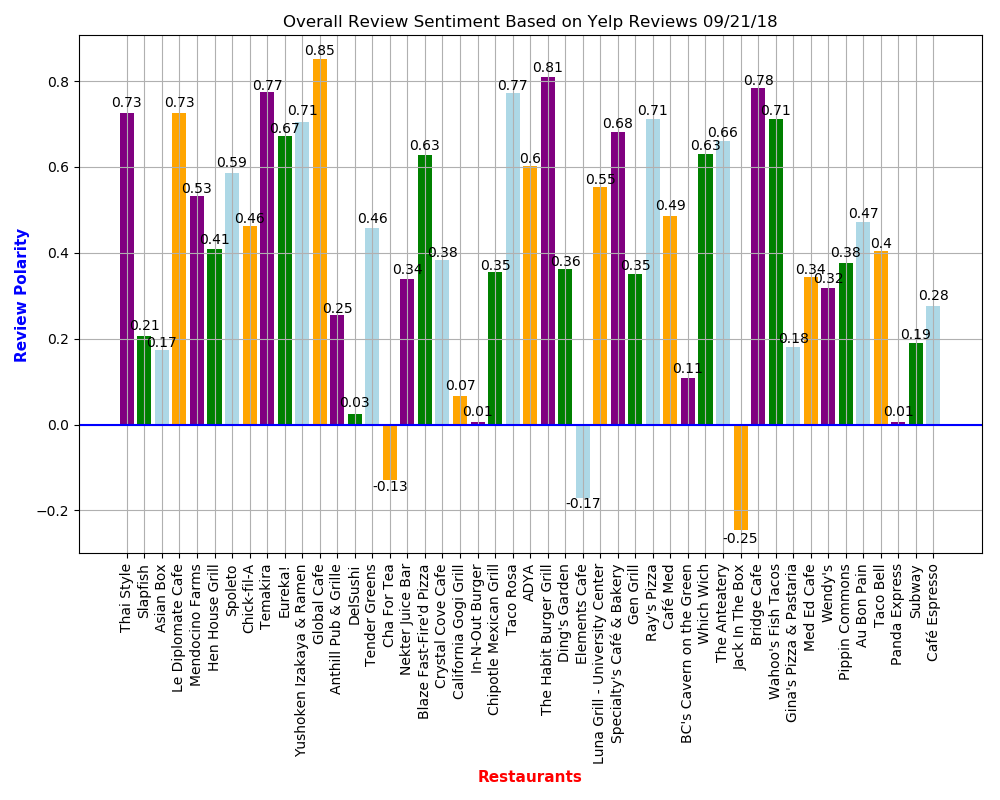

In [109]:
#define chart values
x_axis = vs_xaxis
y_axis = vs_yaxis
chartname = "Overall Review Sentiment Based on Yelp Reviews " + title_date
imagename = "overall_review_sentiment_yelp.png"
x_title = "Restaurants"
y_title = "Review Polarity"
x_label_color = "red"
y_label_color = "blue"
label_rotation = "vertical"
font_family = "sans-serif"
font_size = "11"
fig_h = 10
fig_l = 8
#barcolors ---use defaults

makebar(x_axis,y_axis,chartname,imagename,x_title,y_title
        ,x_label_color,y_label_color
        ,label_rotation,font_family,font_size,fig_h,fig_l)



---
### Restaurants Review By Distance



In [107]:
#copy the restaurant df as not to alter it later
rest_values_df = restaurant_df.copy()
rest_values_df


,index,yelpid,name,lat,lng,distance miles,distance meters,price rating,price value,review count,review rating,type,sub type,address1,city,state,zip
0,0,Ut9709JWjLlx9CYyTjYYKg,Thai Style,33.640992,-117.855753,0.66,1062,$$,2,4,4.5,Thai,Food Stands,5171 California Ave,Irvine,CA,92617
1,1,TJljvcQrbgaHyrWRTJDSJA,Slapfish,33.649810,-117.838780,0.72,1166,$$,2,631,4.0,Seafood,Fish & Chips,4249 Campus Dr,Irvine,CA,92612
2,2,z6ZyXlSfhftN-h7FfAJo6Q,Asian Box,33.648806,-117.832066,0.91,1461,$,1,286,4.0,Asian Fusion,Vegan,4503 Campus Dr,Irvine,CA,92612
3,3,QzJxZ67PVrqy6Z_5gKfxyw,Le Diplomate Cafe,33.649141,-117.839279,0.75,1210,$,1,1713,4.5,Bakeries,Sandwiches,4237 Campus Dr,Irvine,CA,92612
4,4,jTyfj3e8PIkc4KTVh3sAqw,Mendocino Farms,33.650802,-117.839104,0.77,1242,$$,2,479,4.0,Sandwiches,Salad,4187 Campus Dr,Irvine,CA,92612
5,5,lzx8_1F8TqC9y8L3ElRifg,Hen House Grill,33.649303,-117.832297,0.92,1480,$$,2,747,4.0,Persian/Iranian,Mediterranean,4515 Campus Dr,Irvine,CA,92612
6,6,RcWSCtCaDcn9FPZwM0AQrg,Spoleto,33.651059,-117.839014,0.79,1272,$$,2,280,4.0,Italian,Salad,4175 Campus Dr,Irvine,CA,92612
7,7,8bYPc0rN7XEJtyGoN-I6Lg,Chick-fil-A,33.649645,-117.839674,0.69,1103,$,1,145,3.5,Fast Food,n/a,4127 Campus Dr,Irvine,CA,92612
8,8,tKKPXIpijBNRqHz90UX5JA,Temakira,33.650506,-117.838217,0.78,1247,$,1,94,3.5,Sushi Bars,Japanese,4237 Campus Dr,Irvine,CA,92612
9,9,pm1SGfjnSDIDw-1W1XbCSQ,Eureka!,33.650563,-117.839237,0.75,1213,$$,2,800,3.5,American (New),Bars,4143 Campus Dr,Irvine,CA,92612


In [106]:
# Value $ DataFrame
value_1 = rest_values_df[rest_values_df['price value'] == 1]
#value_1

# Value $$ Dataframe
value_2 = restaurant_df[restaurant_df['price value'] == 2]
#value_2

# Value $$$ DataFrame
value_3 = restaurant_df[restaurant_df['price value'] == 3]
value_3

,index,yelpid,name,lat,lng,distance miles,distance meters,price rating,price value,review count,review rating,type,sub type,address1,city,state,zip


<IPython.core.display.Javascript object>


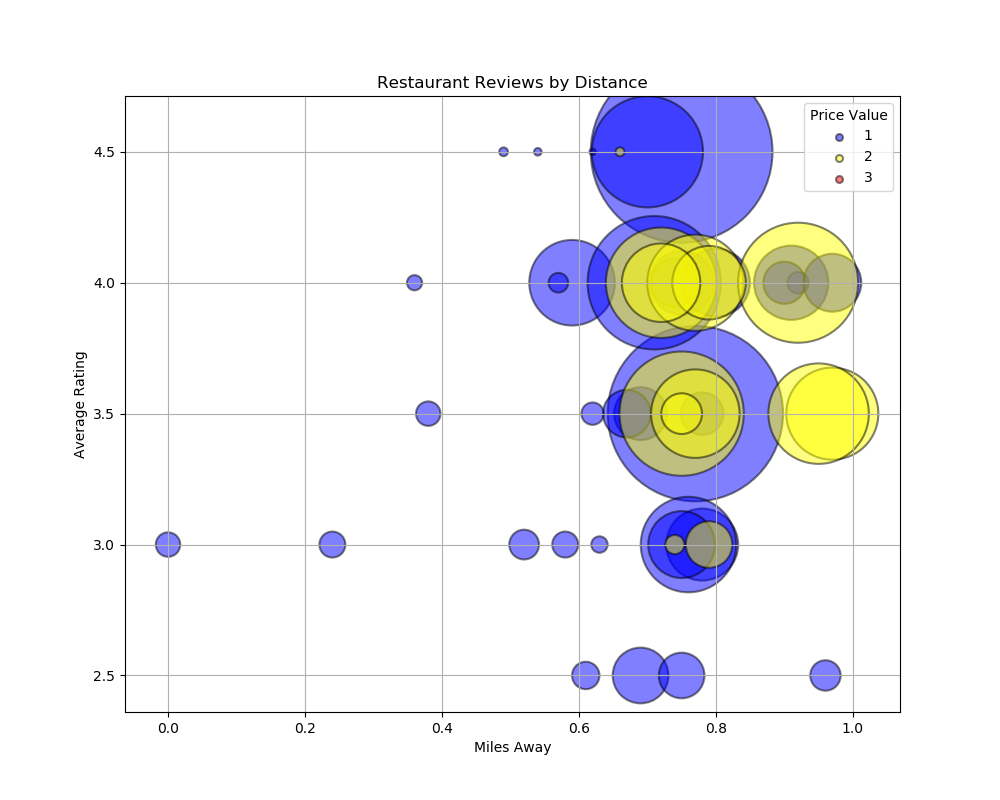

In [113]:
#reviews by distance rbd
rbd_distance1 = value_1["distance miles"]
rbd_distance2 = value_2["distance miles"]
rbd_distance3 = value_3["distance miles"]

rbd_review_1 = value_1["review rating"]
rbd_review_2 = value_2["review rating"]
rbd_review_3 = value_3["review rating"]

rbd_count1 = value_1["review count"]
rbd_count2 = value_2["review count"]
rbd_count3 = value_3["review count"]


rbd_xlabel = 'Miles Away'
rbd_ylabel = 'Average Rating'
rbd_map_title = 'Restaurant Reviews by Distance'
rbd_legend_title = 'Price Value'
rbd_imagename = "rating_by_distance"


#rbd_data = []
#rbd_results = {"distance":rbd_distance1,"rating":rbd_review_1,"count":rbd_count1}
#rbd_data.append(rbd_results)
#rbd_results = {"distance":rbd_distance2,"rating":rbd_review_2,"count":rbd_count2}
#rbd_data.append(rbd_results)
#rbd_results = {"distance":rbd_distance3,"rating":rbd_review_3,"count":rbd_count3}
#rbd_data.append(rbd_results)


#use function derived from jb logic 
scatterbyvalue(rbd_distance1, rbd_review_1, rbd_count1
               ,rbd_distance2, rbd_review_2, rbd_count2
               ,rbd_distance3, rbd_review_3, rbd_count3
               ,rbd_xlabel, rbd_ylabel,rbd_map_title,rbd_legend_title,rbd_imagename)





In [117]:
#show a map
restaurant_df.head(3)

,index,yelpid,name,lat,lng,distance miles,distance meters,price rating,price value,review count,review rating,type,sub type,address1,city,state,zip
0,0,Ut9709JWjLlx9CYyTjYYKg,Thai Style,33.640992,-117.855753,0.66,1062,$$,2,4,4.5,Thai,Food Stands,5171 California Ave,Irvine,CA,92617
1,1,TJljvcQrbgaHyrWRTJDSJA,Slapfish,33.649810,-117.838780,0.72,1166,$$,2,631,4.0,Seafood,Fish & Chips,4249 Campus Dr,Irvine,CA,92612
2,2,z6ZyXlSfhftN-h7FfAJo6Q,Asian Box,33.648806,-117.832066,0.91,1461,$,1,286,4.0,Asian Fusion,Vegan,4503 Campus Dr,Irvine,CA,92612


In [135]:
#ulat = uci_address_df['lat']
#ulng = uci_address_df['lng']
#uname = uci_address_df['Location Name']
#uaddress = uci_address_df['Address']



#33.640495,-117.844296
#uci_coordinates = ()
#uci_coordinates
gmaps.figure(center=33.640495,-117.844296, zoom_level=12)



SyntaxError: positional argument follows keyword argument (<ipython-input-135-edce9fba78a1>, line 8)